In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
img  = nib.load('/Users/ata/Desktop/vision/BLG453/term project/part4/V.nii').dataobj
gt = nib.load('/Users/ata/Desktop/vision/BLG453/term project/part4/V_seg.nii').dataobj

In [3]:
def dice_score(seg,gt,eps = 0.0000001):
    dice = ((np.sum(seg[gt==1])*2.0)+eps) / (np.sum(seg) + np.sum(gt)+eps)
    return dice
def seed_selector(img,th = 10):
    seeds=[]
    w = 10
    h = 20
    w_size =10
    for i in range (w_size) :
        window = img[h*(i):h*(i+1),w*(i):w*(i+1)]
        temp = np.sum(window)
        if temp > th:            
            inds = np.where(window == 255)
            y = inds[0][0]+ (h*(i)) 
            x = inds[1][0]+ (w*(i)) 
            seeds.append((y,x))
    return seeds

In [4]:
def region_grow(img, seeds, points):
    h,w = img.shape
    seg_map = np.zeros(img.shape)
     
    while(len(seeds)>0):
        pt = seeds.pop(0)
        seg_map[pt] =1
        for i in range(len(points)):
            y = pt[0] + points[i][0]
            x = pt[1] + points[i][1]
            if y < 0 or x < 0 or y >= h or x >= w:
                continue
            diff = img[pt] - img[y,x]
            if diff==0 and seg_map[y,x] == 0:
                seg_map[y,x] = 1
                seeds.append((y,x))
    return seg_map
    

In [8]:
gt = np.array(gt)
for i in range(img.shape[2]):
    if i ==0:
        a = gt[:,:,i].flatten()
    else :
        a = np.concatenate((a,gt[:,:,i].flatten()),axis = None)


In [7]:
points_4 = [ (0, -1), (1, 0),(0, 1), (-1, 0)]
# points_8 = [ Point(0, -1), Point(1, 0),Point(0, 1), Point(-1, 0)]
label_list = []
for i in range(img.shape[2]):
    den = np.uint8(img[:,:,i]*255)
    dst = cv2.bilateralFilter(den,9,100,100)
    dst = cv2.threshold(dst, 127, 255, cv2.THRESH_BINARY)[1]
    seeds = seed_selector(dst)
    if seeds == []:        
        labels = np.zeros(dst.shape) #if empty         
    else:
        labels = region_grow(dst,seeds,points_4 )
    if i ==0:
        b = labels.flatten()
    else :
        b = np.concatenate((b,labels.flatten()),axis = None)
    label_list.append(labels)

In [9]:
dice_score(a,b)

0.885912901247422

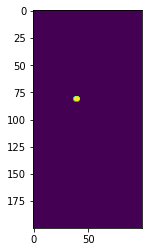

In [11]:
plt.imshow(gt[:,:,55])

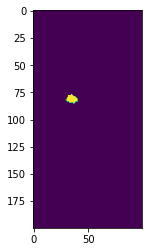

In [10]:
plt.imshow(label_list[55])

# 3D 

In [12]:
def region_grow3d(img, seeds, points):
    h,w,d = img.shape
    seg_map = np.zeros(img.shape)
     
    while(len(seeds)>0):
        pt = seeds.pop(0)
        seg_map[pt] =1
        for i in range(len(points)):
            y = pt[0] + points[i][0]
            x = pt[1] + points[i][1]
            z = pt[2] + points[i][2]
            if y < 0 or x < 0 or z < 0 or y >= h or x >= w or z >=d:
                continue
            diff = img[pt] - img[y,x,z]
            if diff==0 and seg_map[y,x,z] == 0:
                seg_map[y,x,z] = 1
                seeds.append((y,x,z))
    return seg_map

In [30]:
points_26 = []
for y in range(-1,2):
    for x in range(-1,2):
        for z in range(-1,2):
            if (y,x,z)!= (0,0,0):
                points_26.append((y,x,z))

26